# Los Angeles Metro COVID-19 Recovery

In [1]:
import altair
import contextily
import pandas
import geopandas

/home/ian/miniconda3/envs/gis/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
bus_ridership = pandas.read_parquet("metro-bus-covid-recovery.parquet")
bus_lines = geopandas.read_file("https://developer.metro.net/wp-content/uploads/2021/02/All0620.zip")

In [3]:
top_bus_lines = (
    bus_ridership.groupby("line")
    .ridership_2019
    .mean()
    .sort_values(ascending=False)
    .head(30)
)
top_bus_lines

line
720    28362.583333
51     23427.333333
901    21634.000000
16     20841.583333
754    20183.750000
204    20162.833333
18     17574.750000
910    17554.416667
14     16671.916667
207    16152.750000
108    14971.166667
111    14858.083333
4      14543.083333
60     14109.083333
115    13982.583333
40     13921.500000
45     13712.250000
81     13297.583333
20     12803.833333
757    11893.250000
30     11879.666667
2      11796.250000
53     11575.454545
10     11441.750000
200    11090.333333
233    11047.833333
212    10945.000000
206    10834.750000
66     10711.666667
152    10586.416667
Name: ridership_2019, dtype: float64

In [4]:
bus_ridership = bus_ridership.assign(
    recovery=bus_ridership.ridership/bus_ridership.ridership_2019
)

In [5]:
chart = (
    altair.Chart(
        bus_ridership[bus_ridership.line.isin(top_bus_lines.index)],
        width=1024,
        height=512,
        title="Metro bus ridership recovery",
    )
    .mark_line()
    .encode(
        x=altair.X("date:T", title="Date"),
        y=altair.Y("recovery:Q", title="Fraction of 2019 weekday ridership"),
        color=altair.Color("line:N", title="Line"),
    )
)

tooltip = chart.mark_point(
    size=100, opacity=0,
).encode(
    tooltip=[
        altair.Tooltip("line:N", title="Line"),
        altair.Tooltip("recovery:Q", title="Fraction of 2019 weekday ridership"),
    ]
)
figure = (chart + tooltip)
figure

alt.LayerChart(...)

In [6]:
import altair_saver
altair_saver.save(figure, "metro-recovery-chart.html")

In [7]:
bus_ridership_recovery = (
    bus_ridership[bus_ridership.date == bus_ridership.date.max()]
    .sort_values("recovery", ascending=False)
)
bus_ridership_recovery.head(30)

,date,line,ridership,ridership_2019,ridership_2018,recovery
775,2021-02-01,105,9378.0,10057.083333,10228.416667,0.932477
2093,2021-02-01,251,7516.0,8088.250000,8427.166667,0.929249
176,2021-02-01,28,6613.0,8274.416667,9059.000000,0.799210
450,2021-02-01,66,8439.0,10711.666667,11083.833333,0.787833
2593,2021-02-01,611,1172.0,1503.833333,1535.916667,0.779342
700,2021-02-01,94,3127.0,4210.916667,4430.666667,0.742594
2193,2021-02-01,260,6901.0,9499.666667,9901.333333,0.726447
1893,2021-02-01,233,7952.0,11047.833333,11521.750000,0.719779
1418,2021-02-01,180,5568.0,7962.833333,7966.500000,0.699249
1668,2021-02-01,210,7129.0,10197.416667,10297.416667,0.699099


In [8]:
metro_lines_recovery = bus_lines.merge(
    bus_ridership_recovery,
    left_on="VAR_ROUTE",
    right_on="line",
    how="inner"
)

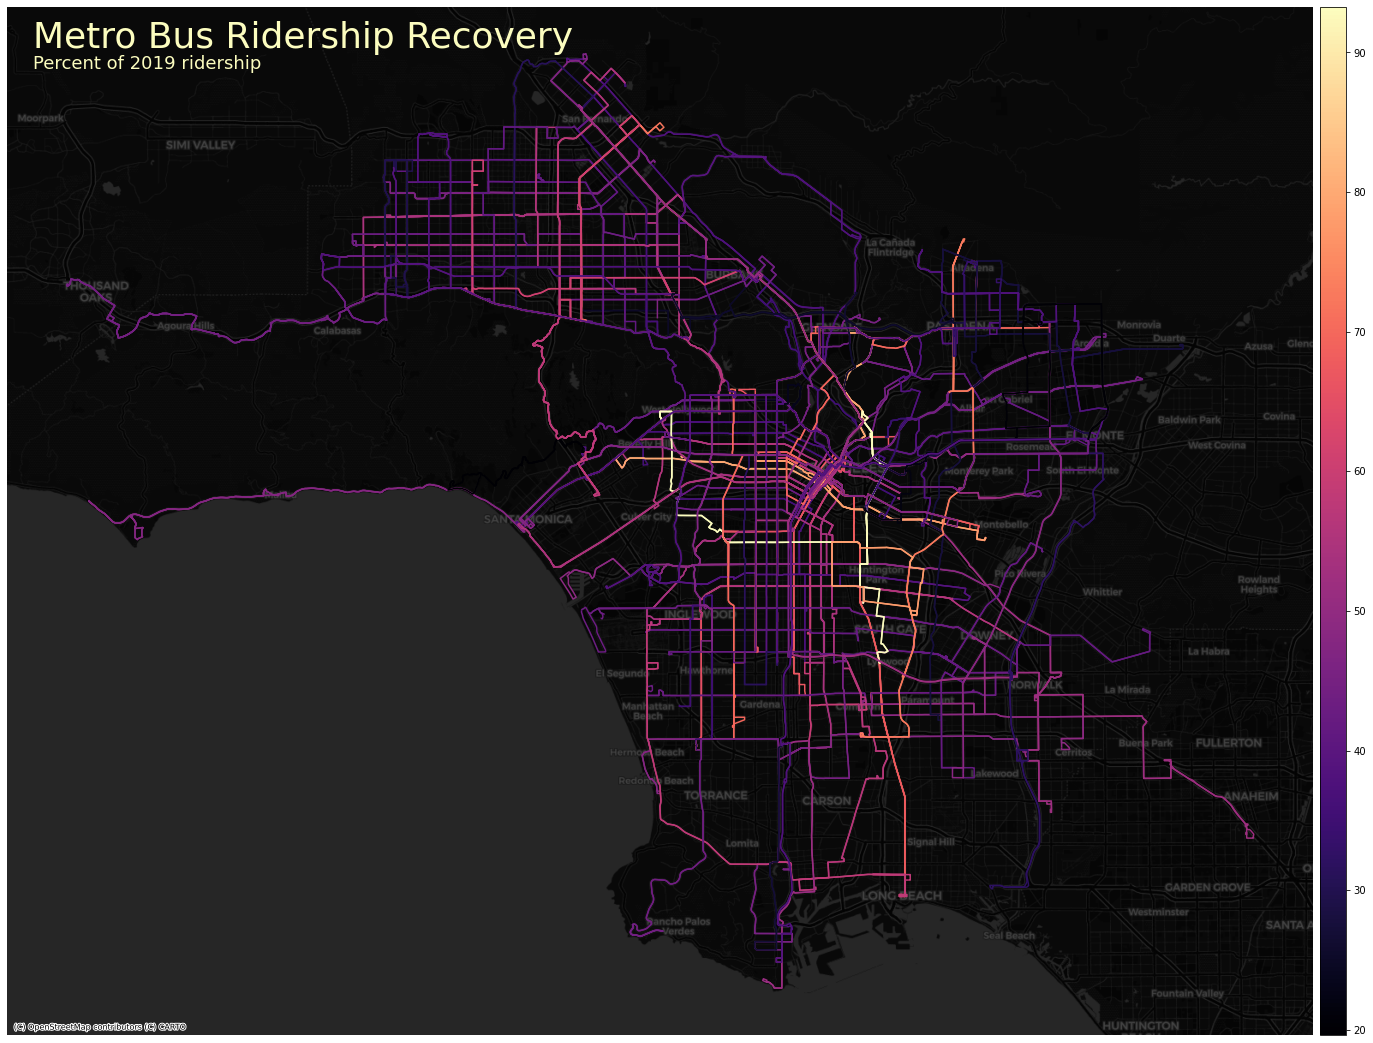

In [9]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

cmap = plt.get_cmap("magma")
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(24,24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)

metro_lines_recovery.to_crs(epsg=3857).plot(
    figsize=(24,24),
    cmap=cmap,
    column=metro_lines_recovery.recovery * 100.,
    legend=True,
    ax=ax,
    cax=cax,
)
contextily.add_basemap(ax, source=contextily.providers.CartoDB.DarkMatter)
ax.text(0.02, 0.96,"Metro Bus Ridership Recovery", color=cmap(1.0), fontsize=36, transform=ax.transAxes)
ax.text(0.02, 0.94,"Percent of 2019 ridership", color=cmap(1.0), fontsize=18, transform=ax.transAxes)
ax.set_axis_off()

plt.close()
fig.savefig("metro-recovery-map.png")
fig